In [60]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from jupyterthemes import jtplot

jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)

np.random.seed(42)

In [1]:
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

4431872/4422102 [==============================] - 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [5]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle boot']

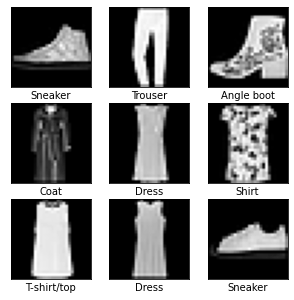

In [28]:
# dataset sampling

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx], cmap='gray')
    plt.xlabel(class_name[y_train[idx]])
plt.show()

In [30]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [33]:
first_model = Sequential()
first_model.add(Flatten(input_shape = (28, 28)))
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))
first_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc'])

first_history = first_model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 3ms/step - loss: 4.7438 - acc: 0.6838 - val_loss: 1.3887 - val_acc: 0.7522
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 1.0005 - acc: 0.7704 - val_loss: 0.8679 - val_acc: 0.7744
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.7266 - acc: 0.7941 - val_loss: 0.8651 - val_acc: 0.7662
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.6131 - acc: 0.8086 - val_loss: 0.7312 - val_acc: 0.7913
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.5527 - acc: 0.8172 - val_loss: 0.6145 - val_acc: 0.8160
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.5174 - acc: 0.8257 - val_loss: 0.5620 - val_acc: 0.8228
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4827 - acc: 0.8344 - val_loss: 0.5318 - val_acc: 0.8315
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

In [34]:
second_model = Sequential()
second_model.add(Flatten(input_shape = (28, 28)))
second_model.add(Dense(128, activation='relu'))
second_model.add(Dense(128, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax'))
second_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc'])

second_history = second_model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 2.6341 - acc: 0.3694 - val_loss: 1.5306 - val_acc: 0.4809
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 1.1841 - acc: 0.5992 - val_loss: 1.0343 - val_acc: 0.6247
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.8399 - acc: 0.6819 - val_loss: 0.7421 - val_acc: 0.7012
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.6418 - acc: 0.7397 - val_loss: 0.5962 - val_acc: 0.7455
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.5583 - acc: 0.7664 - val_loss: 0.5671 - val_acc: 0.7668
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.5119 - acc: 0.7910 - val_loss: 0.5434 - val_acc: 0.7928
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4864 - acc: 0.8070 - val_loss: 0.5675 - val_acc: 0.7924
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

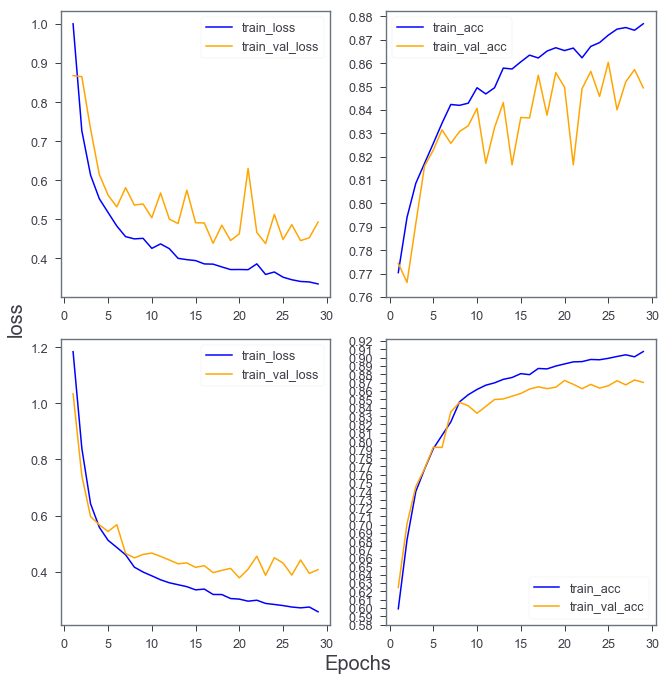

In [61]:
def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i % 2]
        val_temp = keys[(i + 2) % 2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color='blue', label='train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color='orange', label='train_' + val_temp)
        if (i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size=20)
    ax.set_xlabel('Epochs', size=20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)